<a href="https://colab.research.google.com/github/zbrze/FPGA/blob/master/MOwNiT_lab_%C4%87w_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Szybka transformata Fouriera (FFT - Fast Fourier Transform)

Zapoznaj się ze sposobem działania transformacji Fouriera i jej praktycznym zastosowaniem. 

W poniższym ćwiczeniu korzystamy z biblioteki FFT będącej częścią pakietu scipy

In [0]:
from scipy import fft

#### Przykład 
Analiza sygnału wygenerowanego funkcją okresową $sin(2 \pi t)$. Częstotliowścią sygnału określamy liczbę pełnych zmian sygnału w określonej jednostce czasu. Przyjmując przedział $t:[0..1]$ częstotliwość funkcji $f(t) = sin(2 \pi t)$ wynozi 1 Hz. Zwizualizujmy ten sygnał: 

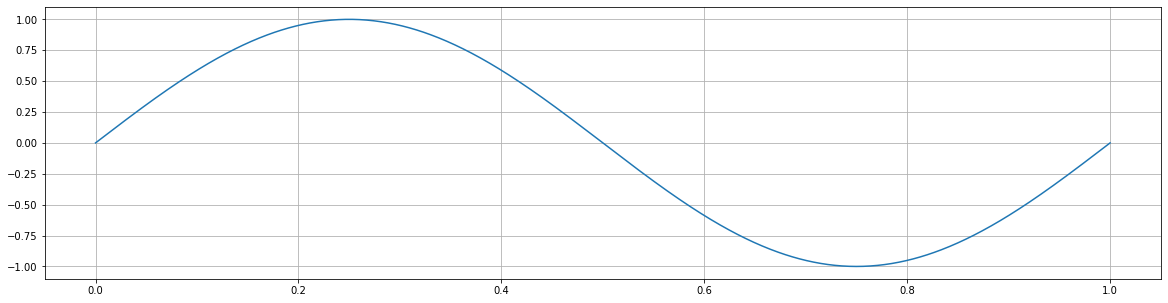

In [7]:
import numpy as np
# liczba próbek 
N = 1000
# częstotliwość 
F=1
t = np.linspace(0.0, 1.0, N)
ft = np.sin(2*np.pi*t*F)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

Manipulując parametrem F w powyższym kodzie mozemy zmieniać częstotliwość sygnału. 

Zastosujmy szybkąd transformatę Fouriera do spróbkowanego przebiegu tej funkcji. 

Wynikiem działania algorytmu jest widmo sygnału czyli reprezentacja częstotliwościowa. Na podstawie N próbek sygnału wyliczane jest N wartości zespolonego widma, jednak zazwyczaj interesuje nas moduł widma, który możemy wyznaczyć funkcją np.abs(). Element yf[0] zawiera składową średnią sygnału, yf[1:n//2] zawiera współczynniki odpowiadające dodatnim częstościom, a yf[n//2+1:]  współczynniki odpowiadające ujemnym częstościom. Dla naszych potrzeb wystarczy zwizualizować połowę tablicy yf (w tym przypadku druga część zawiera lustrzaną kopie widam z pierwszej części tablicy). 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  This is separate from the ipykernel package so we can avoid doing imports until


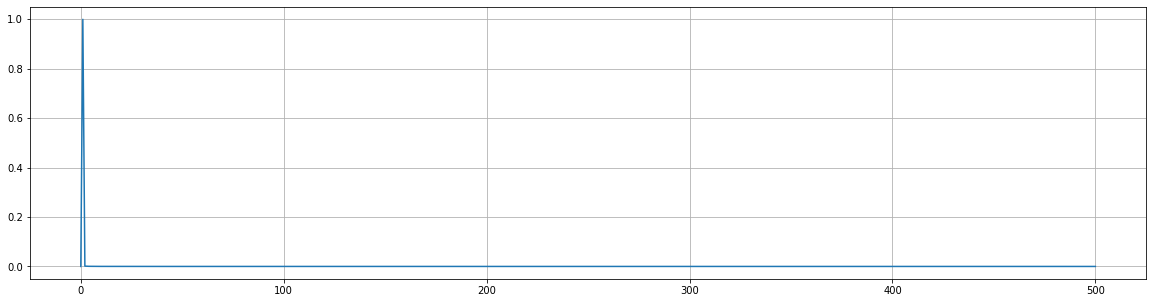

In [8]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 1
Wygeneruj sygnał sinusoidalny składający się z dwóch lub więcej składowych o różnych częstotliwościach. Zwizualizuj sygnał i dokonaj jego analizy z wykorzystaniem FFT. 


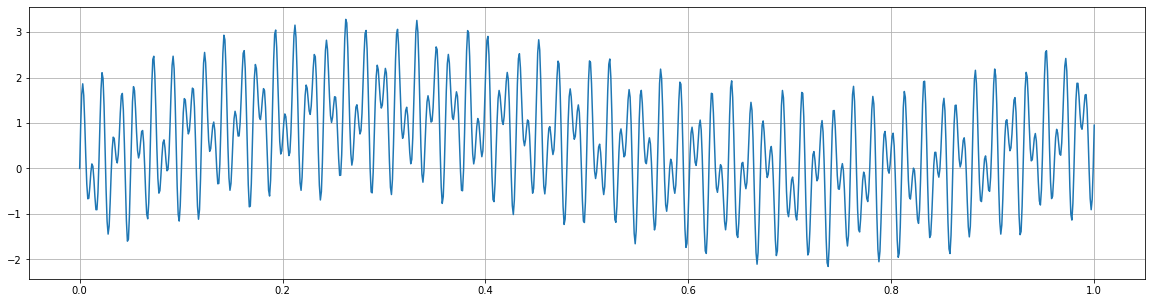

In [15]:
F=[0.2, 1, 58, 100]
ft = np.sin(2*np.pi*t*F[0]) + np.sin(2*np.pi*t*F[1]) + np.sin(2*np.pi*t*F[2]) + np.sin(2*np.pi*t*F[3])
t = np.linspace(0.0, 1.0, N)
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

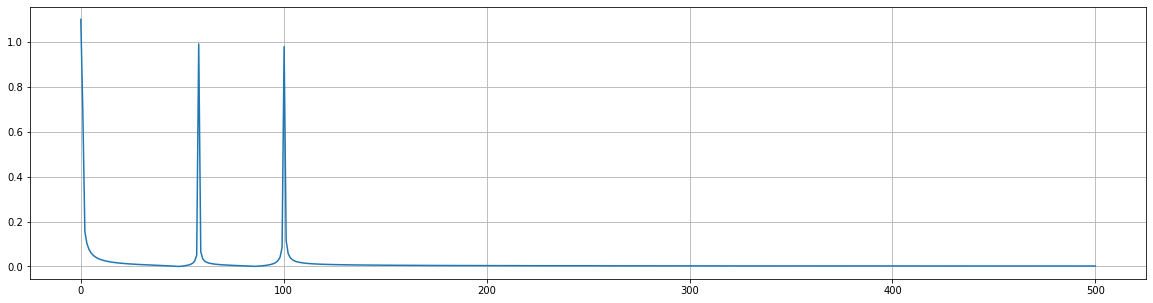

In [16]:
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 2
Odszumianie sygnału. 
1. Wypełniamy tablicę wartościami funkcji sinus ("sygnał") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand(). 
2. Proszę narysować wykres zaszumionej funkcji. 



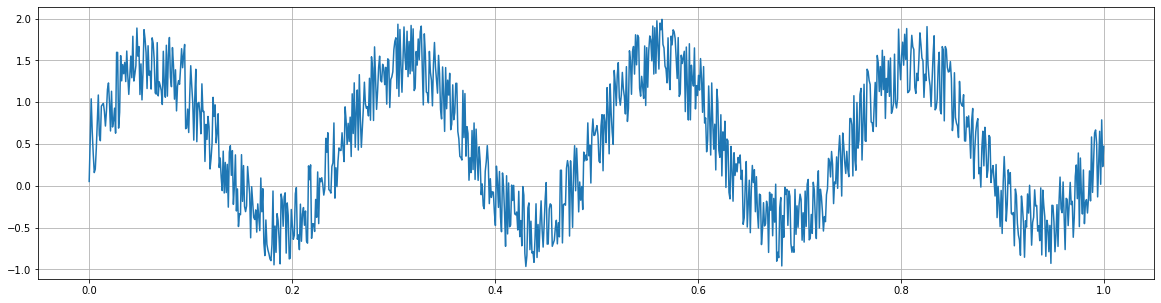

In [17]:
from random import random
F = 4
ft = [(np.sin(2*np.pi*t[i]*F) + random()) for i in range(0, len(t))]
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t, ft)
plt.grid()
plt.show()



3. Wykonać FFT dla takiego sygnału i narysować wykres transformaty Fouriera (widmo) tego sygnału (jak poprzednio). Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału. 


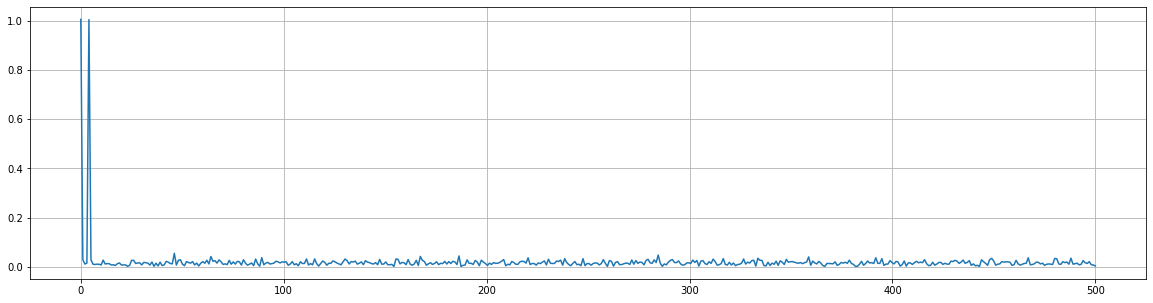

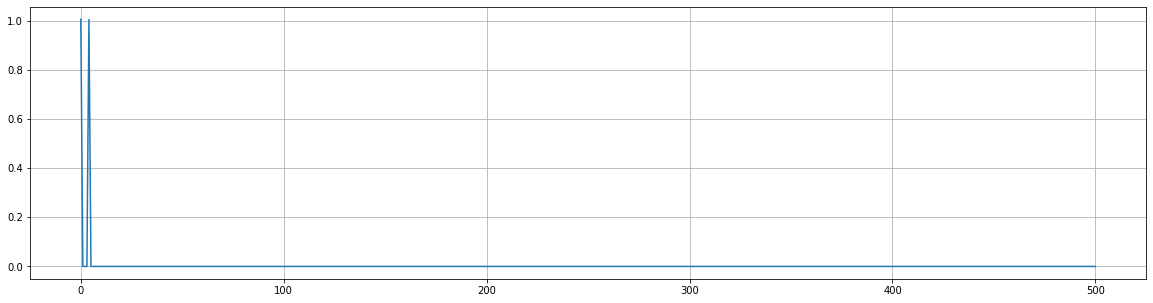

In [29]:
T = 1.0 / N
yf = fft.fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()
yf_ = np.abs(yf[0:N//2])
for i in range(0, len(yf)//2):
  if(yf_[i] < 50):
    yf_[i] = 0
    yf[i] = 0
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

4. Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci rzeczywistej. Porównać z wejściowym wykresem sygnału. 

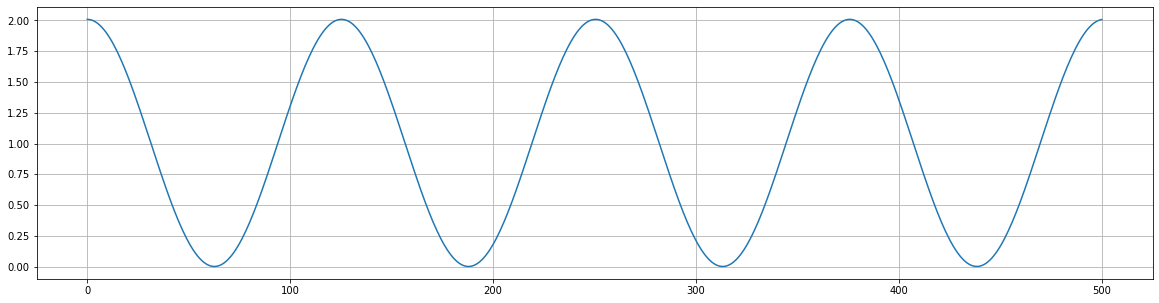

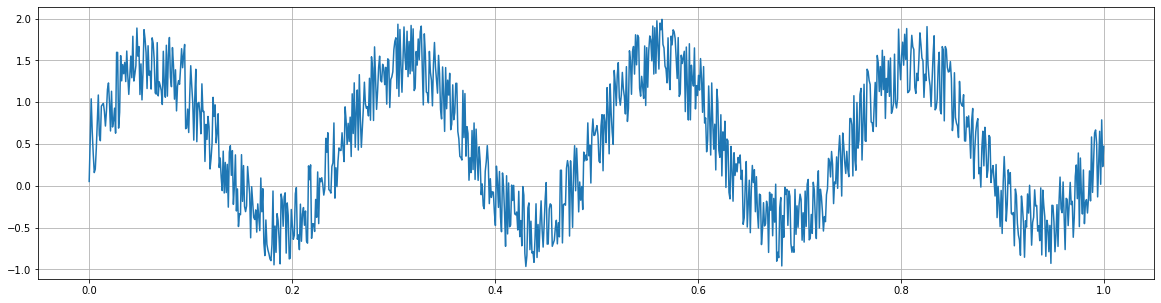

In [31]:
y = np.real(fft.ifft(yf_))
plt.plot(xf, y[0:N//2])
plt.grid()
plt.show()
plt.plot(t, ft)
plt.grid()
plt.show()

Sygnał jest wyraźnie odszumiony i minimalnie przesunięty



### Zadanie 3 
Proszę nagrać własny glos lub jakikolwiek inny dźwięk i przenalizowac go przy pomocy FFT (jak powyżej).
Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt. 




```
from scipy.io import wavfile
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':
   rate, sound_samples =  wavfile.read('rattlesnake3.wav')
   N =len(sound_samples)
   sound_samples = sound_samples / (2.**15)
   x = np.linspace(0.0, N,  N)
   x = x / rate
   plt.rcParams['figure.figsize'] = [20, 5]
   plt.plot(x, sound_samples)
   plt.ylabel("Amplituda")
   plt.xlabel("Czas")
   plt.grid()
   plt.savefig('soundvawe.png')
   plt.show()

```



![alt text](https://github.com/zbrze/MOWNIT-python-/blob/master/soundvawe.png?raw=true)






```
   #fft
   T = 1.0 / N
   yf = fft.fft(sound_samples)
   xf = np.linspace(0.0, 1.0 / (2.0 * T), N// 2)
   plt.rcParams['figure.figsize'] = [20, 5]
   plt.plot(xf, np.abs(yf[0:N // 2]))
   plt.grid()
   plt.savefig('soundvawe_fft.png')
   plt.show()

```



![alt text](https://github.com/zbrze/MOWNIT-python-/blob/master/soundvawe_fft.png?raw=true)



```
   #usuwamy niektóre częstotliwości
   for i in range(len(xf)):
      if(0 < xf[i]  < 15000 or 25000 < xf[i]  < 35000 ):
         yf[i] = 0
   plt.plot(xf, np.abs(yf[0:N // 2]))
   plt.grid()
   plt.savefig('soundvawe_fft_altered.png')
   plt.show()
```



![alt text](https://github.com/zbrze/MOWNIT-python-/blob/master/soundvawe_fft_altered.png?raw=true)

In [0]:
   #odwrotna transformata funkcyjna
   y_ifft = np.real(fft.ifft(yf))
   plt.rcParams['figure.figsize'] = [20, 5]
   plt.plot(x, y_ifft)
   plt.grid()
   plt.savefig('new_soundwave.png')
   plt.show()
   wavfile.write('sound_altered.wav', len(y_ifft), y_ifft)

![alt text](https://github.com/zbrze/MOWNIT-python-/blob/master/new_soundwave.png?raw=true)

Z niewiadomych mi przyczyn, po wykonaniu odwrotnej transformaty otrzymany przeze mnie wykres jest prawie taki sam jak wizualizacja dźwięku przed jego zmodyfikowaniem
